In [1]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/travel-insurance-prediction-data/TravelInsurancePrediction.csv


In [127]:
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

import tensorflow as tf
from tensorflow import keras

%matplotlib inline

In [4]:
df = pd.read_csv('../input/travel-insurance-prediction-data/TravelInsurancePrediction.csv')
df.shape

(1987, 10)

In [5]:
df.columns

Index(['Unnamed: 0', 'Age', 'Employment Type', 'GraduateOrNot', 'AnnualIncome',
       'FamilyMembers', 'ChronicDiseases', 'FrequentFlyer',
       'EverTravelledAbroad', 'TravelInsurance'],
      dtype='object')

In [6]:
df.isna().sum()

Unnamed: 0             0
Age                    0
Employment Type        0
GraduateOrNot          0
AnnualIncome           0
FamilyMembers          0
ChronicDiseases        0
FrequentFlyer          0
EverTravelledAbroad    0
TravelInsurance        0
dtype: int64

In [7]:
df.dtypes

Unnamed: 0              int64
Age                     int64
Employment Type        object
GraduateOrNot          object
AnnualIncome            int64
FamilyMembers           int64
ChronicDiseases         int64
FrequentFlyer          object
EverTravelledAbroad    object
TravelInsurance         int64
dtype: object

In [8]:
df.head()

,Unnamed: 0,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,0,31,Government Sector,Yes,400000,6,1,No,No,0
1,1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1
3,3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0
4,4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0


## **Dropping  Unnamed: 0 column**

# df.drop('Unnamed: 0', axis=1, inplace=True)


In [37]:
df.head()

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,31,Government Sector,Yes,400000,6,1,No,No,0
1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1
3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0
4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0


In [27]:
df['GraduateOrNot'].value_counts()

Yes    1692
No      295
Name: GraduateOrNot, dtype: int64

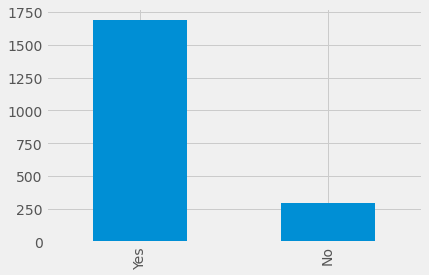

In [31]:
df['GraduateOrNot'].value_counts().plot(kind='bar')
plt.style.use('fivethirtyeight')
plt.show()

## **Age Group with respect to GraduateOrNot** 

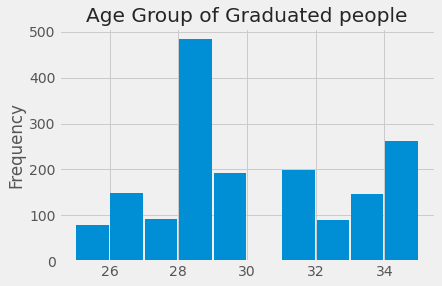

In [28]:
plt.title('Age Group of Graduated people')
plt.style.use('fivethirtyeight')
df['Age'][df['GraduateOrNot'] == 'Yes'].plot(kind='hist', rwidth=0.95)
plt.show()

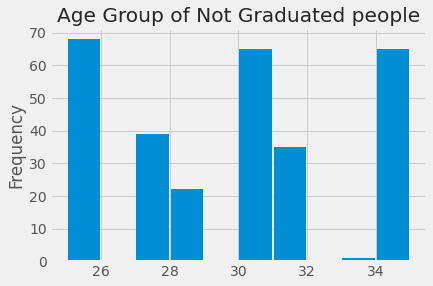

In [29]:
plt.title('Age Group of Not Graduated people')
plt.style.use('fivethirtyeight')
df['Age'][df['GraduateOrNot'] == 'No'].plot(kind='hist', rwidth=0.95)
plt.show()

In [32]:
df['Employment Type'].unique()

array(['Government Sector', 'Private Sector/Self Employed'], dtype=object)

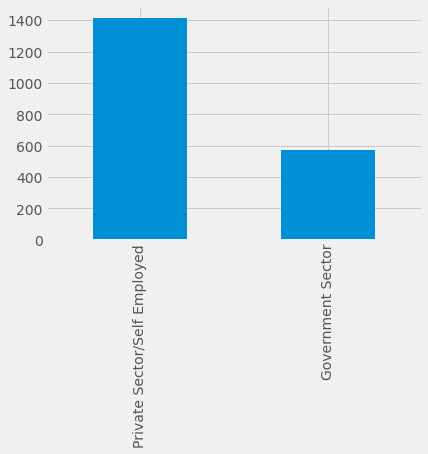

In [36]:
plt.style.use('fivethirtyeight')
df['Employment Type'].value_counts().plot(kind='bar')
plt.show()

## **Annual Income of Govt and Private Employees**

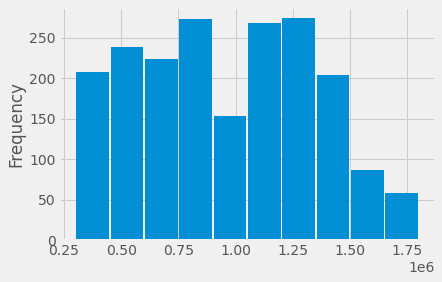

In [39]:
df['AnnualIncome'].plot(kind='hist', rwidth=0.95)
plt.show()

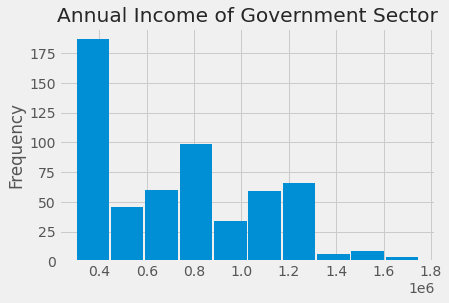

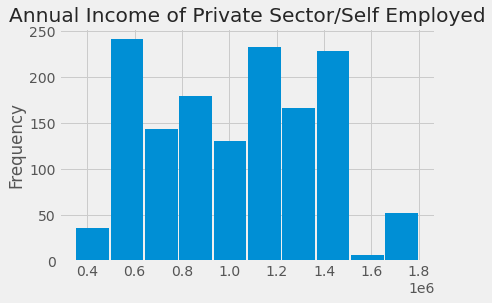

In [41]:
emp_type = ['Government Sector', 'Private Sector/Self Employed']

for typ in emp_type:
    plt.title(f'Annual Income of {typ}')
    df['AnnualIncome'][df['Employment Type'] == typ].plot(kind='hist', rwidth=0.95)
    plt.show()
    print('\n')

## **FamilyMembers**

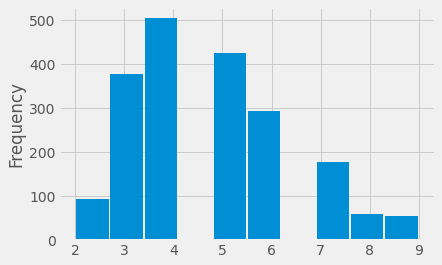

In [46]:
df['FamilyMembers'].plot(kind='hist', rwidth=0.95)
plt.show()

## **FrequentFlyer**

In [48]:
df['FrequentFlyer'].unique()

array(['No', 'Yes'], dtype=object)

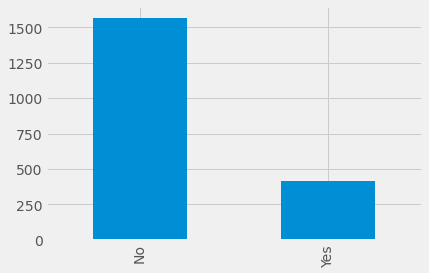

In [50]:
df['FrequentFlyer'].value_counts().plot(kind='bar')
plt.show()

## **EverTravelledAbroad**

In [52]:
df['EverTravelledAbroad'].unique()

array(['No', 'Yes'], dtype=object)

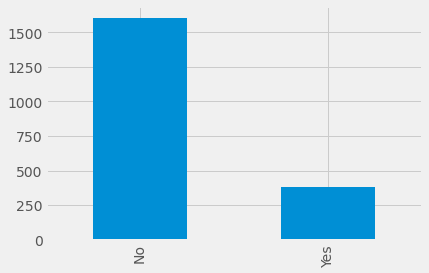

In [54]:
df['EverTravelledAbroad'].value_counts().plot(kind='bar')
plt.show()

# **FrequentFlyers with respect to EverTravelledAbroad**

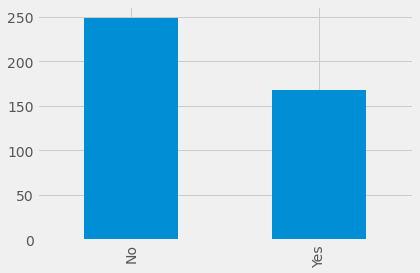

In [59]:
df['EverTravelledAbroad'][df['FrequentFlyer'] == 'Yes'].value_counts().plot(kind='bar')
plt.show()

# **Non FrequentFlyers with respect to EverTravelledAbroad**

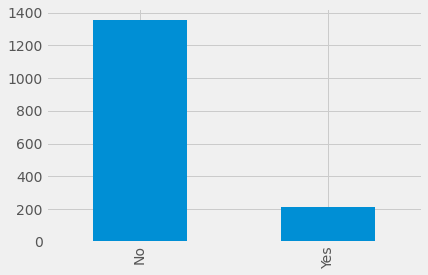

In [60]:
df['EverTravelledAbroad'][df['FrequentFlyer'] == 'No'].value_counts().plot(kind='bar')
plt.show()

## **As we can see FrequentFlyer are more tend travel abroad**

## **TravelInsurance**

In [61]:
df['TravelInsurance'].unique()

array([0, 1])

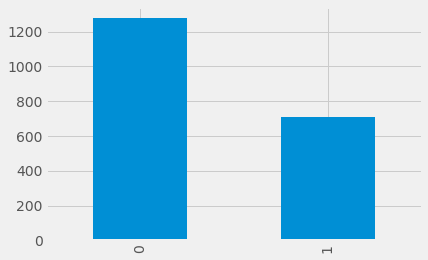

In [62]:
df['TravelInsurance'].value_counts().plot(kind='bar')
plt.show()

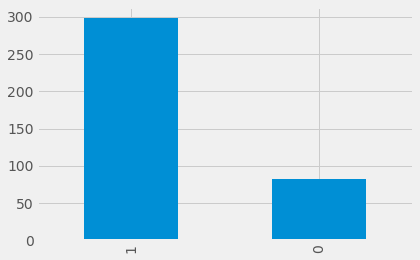

In [63]:
df['TravelInsurance'][df['EverTravelledAbroad'] == 'Yes'].value_counts().plot(kind='bar')
plt.show()
plt.show()

## **TravelInsurance and EverTravelledAbroad**

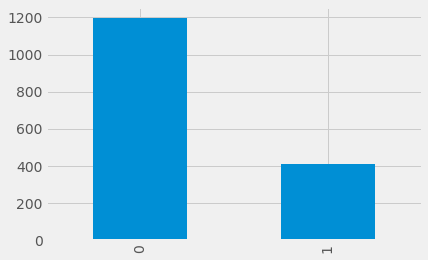

In [64]:
df['TravelInsurance'][df['EverTravelledAbroad'] == 'No'].value_counts().plot(kind='bar')
plt.show()

## **As we can see Abroad Travellers are most likely to have Travel Insurance**

# **ChronicDiseases**

In [69]:
df['ChronicDiseases'].unique()

array([1, 0])

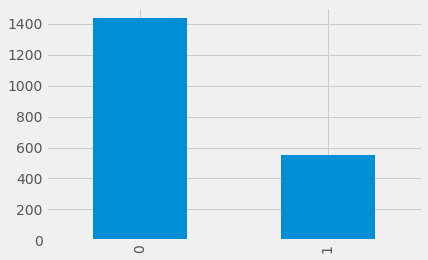

In [72]:
df['ChronicDiseases'].value_counts().plot(kind='bar')
plt.show()

## **Chronic Disease in frequent flyers**

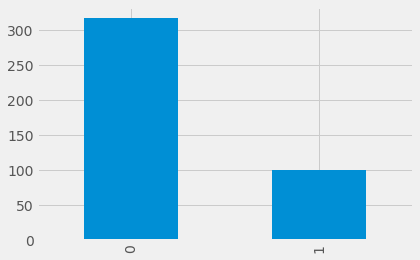

In [81]:
df['ChronicDiseases'][df['FrequentFlyer'] == 'Yes'].value_counts().plot(kind='bar')
plt.show()

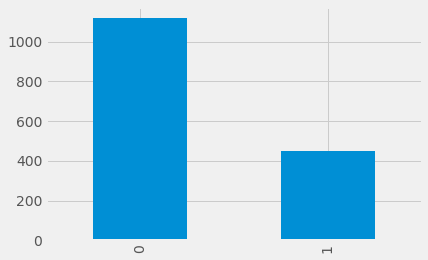

In [82]:
df['ChronicDiseases'][df['FrequentFlyer'] == 'No'].value_counts().plot(kind='bar')
plt.show()

## **Chronic Diseases are more in Non frequent flyers**

# **Encoding Object Data Values**

In [85]:
df.dtypes[df.dtypes == 'object']

Employment Type        object
GraduateOrNot          object
FrequentFlyer          object
EverTravelledAbroad    object
dtype: object

In [86]:
df['Employment Type'].unique()

array(['Government Sector', 'Private Sector/Self Employed'], dtype=object)

In [89]:
df['Employment Type'].replace(['Government Sector', 'Private Sector/Self Employed'],[0, 1],inplace=True)

In [90]:
df['GraduateOrNot'].unique()

array(['Yes', 'No'], dtype=object)

In [92]:
df['GraduateOrNot'].replace(['Yes', 'No'], [1, 0], inplace=True)

In [93]:
df['FrequentFlyer'].unique()

array(['No', 'Yes'], dtype=object)

In [94]:
df['FrequentFlyer'].replace(['Yes', 'No'], [1, 0], inplace=True)

In [95]:
df['EverTravelledAbroad'].unique()

array(['No', 'Yes'], dtype=object)

In [97]:
df['EverTravelledAbroad'].replace(['Yes', 'No'], [1, 0], inplace=True)

# **Scaling Age, Annual Income and Family Members**

In [100]:
cols_to_scale = ['Age', 'AnnualIncome', 'FamilyMembers']
scale = MinMaxScaler()
scale.fit(df[cols_to_scale])

MinMaxScaler()

In [102]:
scaled = scale.fit_transform(df[cols_to_scale])


array([[3.10e+01, 4.00e+05, 6.00e+00],
       [3.10e+01, 1.25e+06, 7.00e+00],
       [3.40e+01, 5.00e+05, 4.00e+00],
       ...,
       [2.80e+01, 1.15e+06, 6.00e+00],
       [3.40e+01, 1.00e+06, 6.00e+00],
       [3.40e+01, 5.00e+05, 4.00e+00]])

In [107]:
for i in range(3):
    df[cols_to_scale[i]] = scaled[:,i]

In [108]:
df.head()

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,0.6,0,1,0.066667,0.571429,1,0,0,0
1,0.6,1,1,0.633333,0.714286,0,0,0,0
2,0.9,1,1,0.133333,0.285714,1,0,0,1
3,0.3,1,1,0.266667,0.142857,1,0,0,0
4,0.3,1,1,0.266667,0.857143,1,1,0,0


# **Splitting and training**

In [115]:
x, y = df.drop('TravelInsurance',axis=1),df['TravelInsurance']

In [116]:
x.head()

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad
0,0.6,0,1,0.066667,0.571429,1,0,0
1,0.6,1,1,0.633333,0.714286,0,0,0
2,0.9,1,1,0.133333,0.285714,1,0,0
3,0.3,1,1,0.266667,0.142857,1,0,0
4,0.3,1,1,0.266667,0.857143,1,1,0


In [117]:
y.head()

0    0
1    0
2    1
3    0
4    0
Name: TravelInsurance, dtype: int64

In [118]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

In [119]:
x_train.shape, x_test.shape

((1390, 8), (597, 8))

In [120]:
y_train.value_counts()

0    894
1    496
Name: TravelInsurance, dtype: int64

In [121]:
y_test.value_counts()

0    383
1    214
Name: TravelInsurance, dtype: int64

# **Model Building**

In [191]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(8,), activation='relu'),
    keras.layers.Dense(6, activation='relu'),
    keras.layers.Dense(1,activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [194]:
model.fit(x_train, y_train, epochs=500)

Epoch 1/500
44/44 [==============================] - 0s 1ms/step - loss: 0.4496 - accuracy: 0.8065
Epoch 2/500
44/44 [==============================] - 0s 1ms/step - loss: 0.4496 - accuracy: 0.8137
Epoch 3/500
44/44 [==============================] - 0s 1ms/step - loss: 0.4498 - accuracy: 0.8108
Epoch 4/500
44/44 [==============================] - 0s 1ms/step - loss: 0.4491 - accuracy: 0.8094
Epoch 5/500
44/44 [==============================] - 0s 1ms/step - loss: 0.4487 - accuracy: 0.8151
Epoch 6/500
44/44 [==============================] - 0s 1ms/step - loss: 0.4492 - accuracy: 0.8101
Epoch 7/500
44/44 [==============================] - 0s 1ms/step - loss: 0.4478 - accuracy: 0.8129
Epoch 8/500
44/44 [==============================] - 0s 1ms/step - loss: 0.4475 - accuracy: 0.8122
Epoch 9/500
44/44 [==============================] - 0s 2ms/step - loss: 0.4473 - accuracy: 0.8108
Epoch 10/500
44/44 [==============================] - 0s 1ms/step - loss: 0.4474 - accuracy: 0.8108
Epoch 11/

In [195]:
model.evaluate(x_train, y_train)

44/44 [==============================] - 0s 1ms/step - loss: 0.4178 - accuracy: 0.8273


[0.4177597463130951, 0.8273381590843201]

In [196]:
model.evaluate(x_test, y_test)

19/19 [==============================] - 0s 1ms/step - loss: 0.4825 - accuracy: 0.8157


[0.4825136959552765, 0.8157454133033752]

In [197]:
y_pred_test = model.predict(x_test)
y_pred_train = model.predict(x_train)

y_pred_test[y_pred_test >= 0.5] = 1
y_pred_test[y_pred_test < 0.5] = 0

y_pred_train[y_pred_train >= 0.5] = 1
y_pred_train[y_pred_train < 0.5] = 0
    


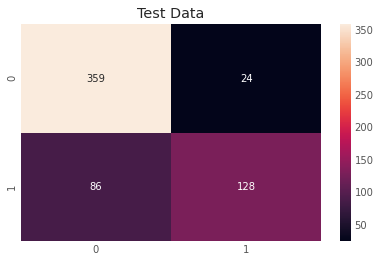

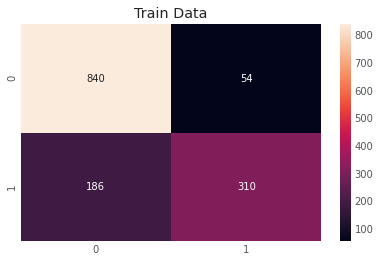

In [198]:

plt.title('Test Data')
sns.heatmap(confusion_matrix(y_test,y_pred_test), annot=True, fmt='g')
plt.show()
print('\n')
plt.title('Train Data')
sns.heatmap(confusion_matrix(y_train,y_pred_train), annot=True, fmt='g', )
plt.show()

In [199]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.81      0.94      0.87       383
           1       0.84      0.60      0.70       214

    accuracy                           0.82       597
   macro avg       0.82      0.77      0.78       597
weighted avg       0.82      0.82      0.81       597



In [200]:
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       0.82      0.94      0.88       894
           1       0.85      0.62      0.72       496

    accuracy                           0.83      1390
   macro avg       0.84      0.78      0.80      1390
weighted avg       0.83      0.83      0.82      1390



# **Because of imbalance in data the accuracy is not improving**